## Importing Libraries and dataset

##### dataset link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import copy, math

In [88]:
df = pd.read_csv('diabetes2.csv')
df.shape

(100000, 9)

## Data Preprocessing

In [89]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [90]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [91]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [92]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [93]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Data Visualization

In [95]:
# Pair Plot for Numerical Features
sns.pairplot(df, hue='diabetes', palette='husl')
plt.title('Pair Plot of Numerical Features')
plt.show()

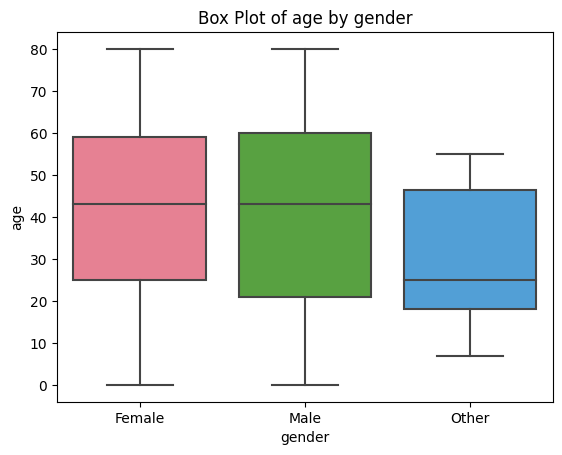

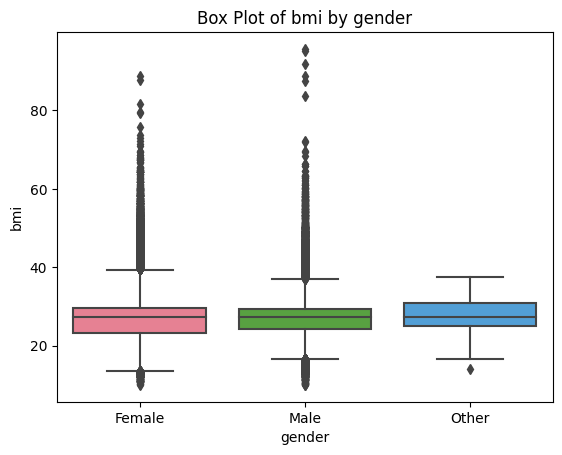

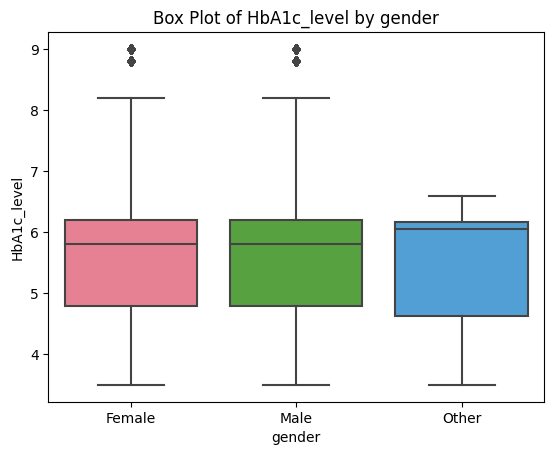

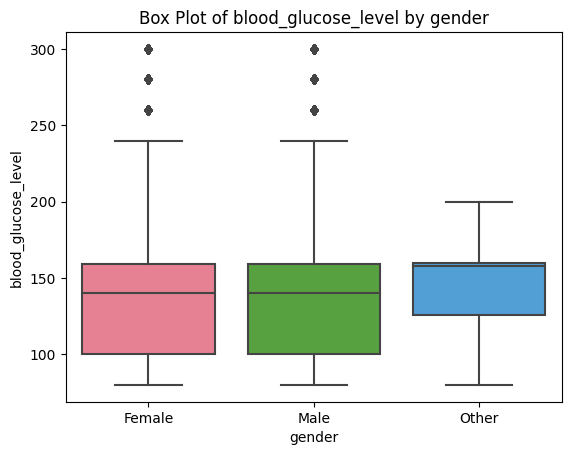

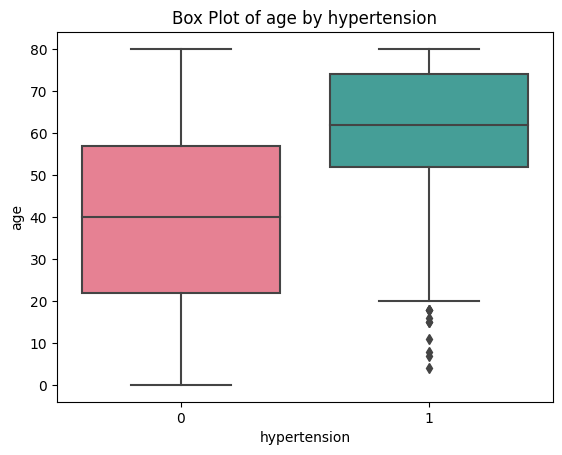

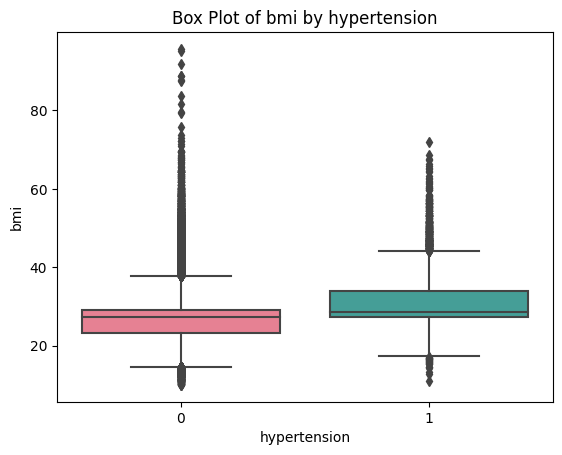

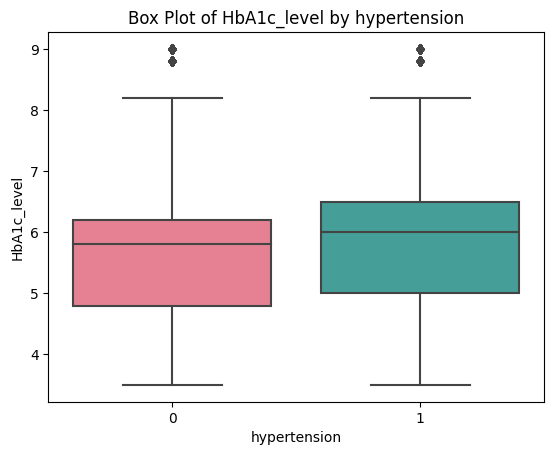

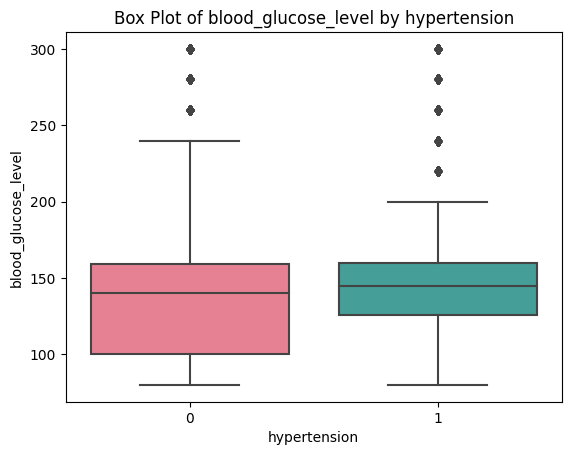

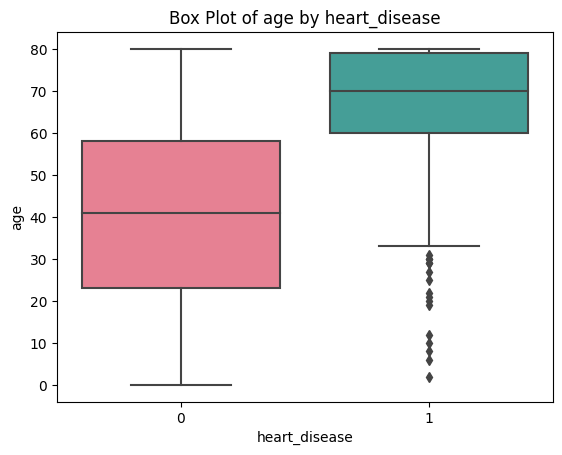

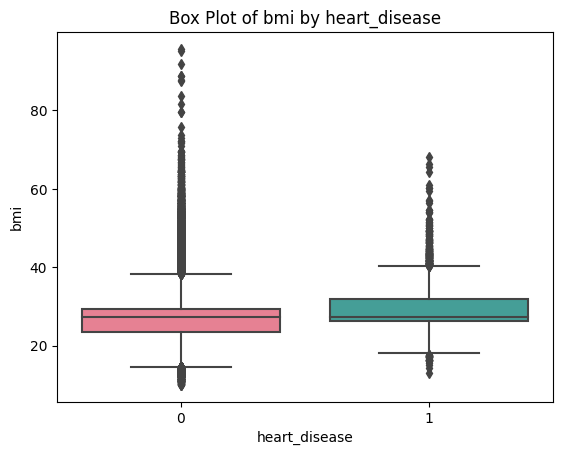

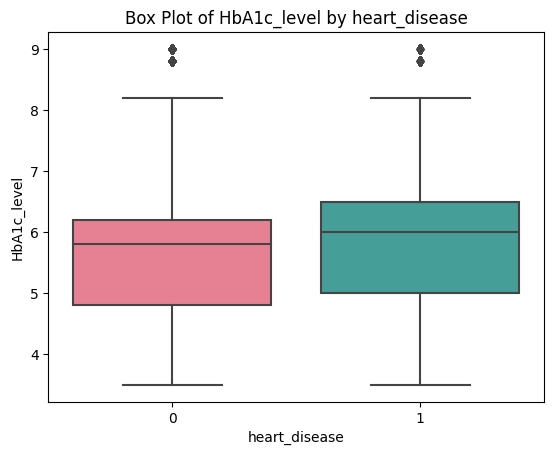

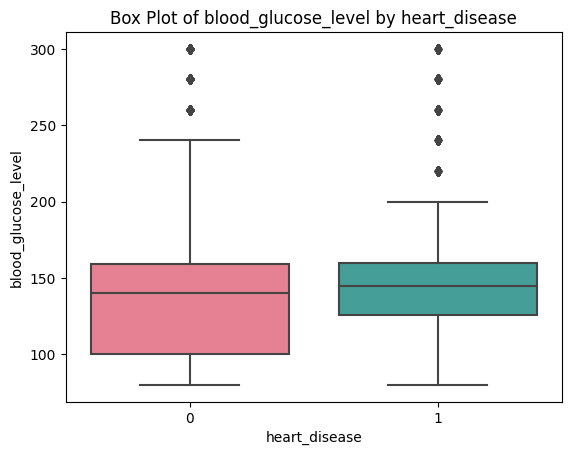

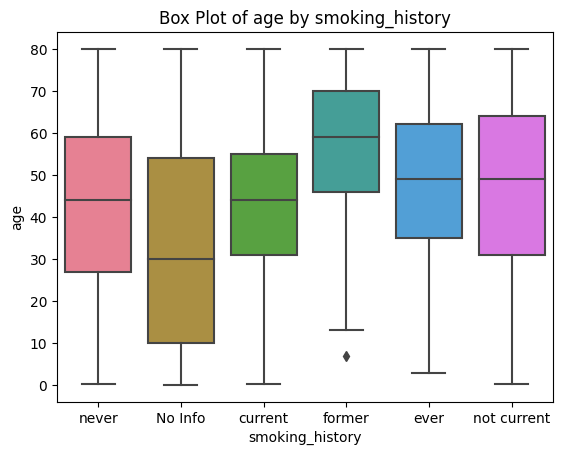

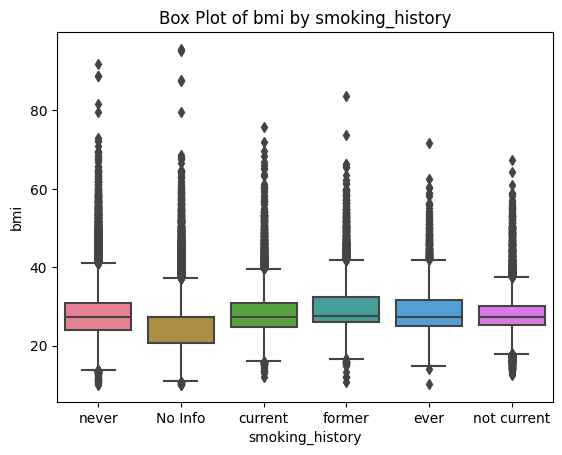

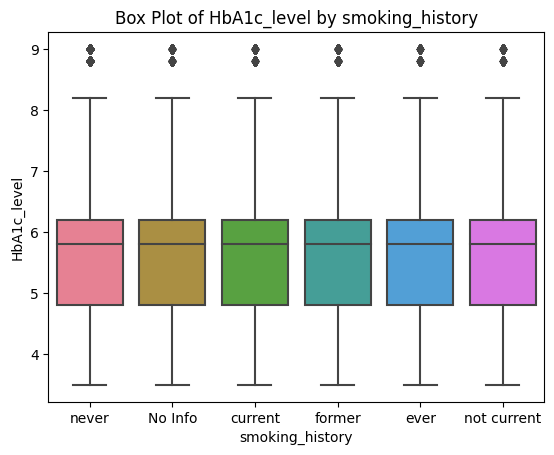

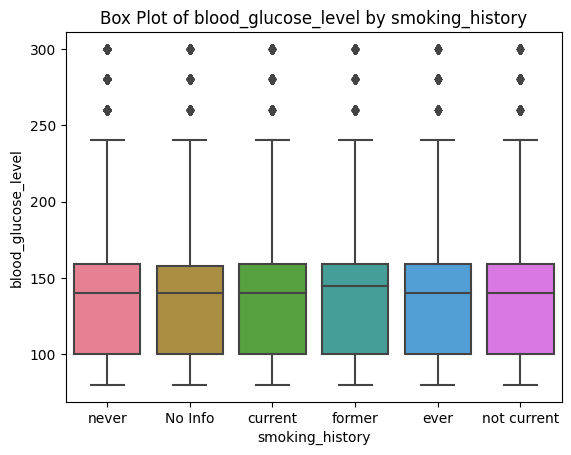

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for multiple numerical columns within categories
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categories = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for category in categories:
    for column in numerical_columns:
        # plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=category, y=column, palette='husl')
        plt.title(f'Box Plot of {column} by {category}')
        plt.xlabel(category)
        plt.ylabel(column)
        plt.show()


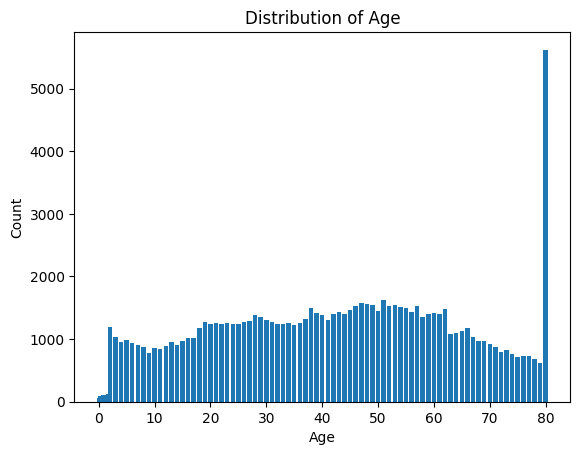

In [97]:
# Assuming df is your DataFrame containing the dataset
# You can use the 'age' column for the bar plot

# Create the bar plot
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the plot
plt.show()


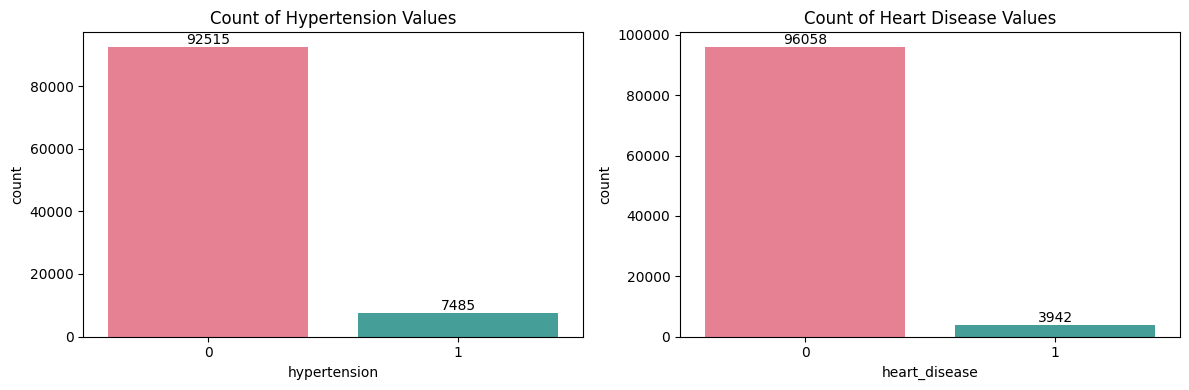

In [98]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count and plot hypertension values
unique_counts_hypertension = df['hypertension'].value_counts()

sns.countplot(data=df, x='hypertension', ax=axes[0], palette='husl')

for i, count in enumerate(unique_counts_hypertension):
    axes[0].text(i, count, str(count), ha='center', va='bottom')
axes[0].set_title('Count of Hypertension Values')

# Count and plot heart_disease values
unique_counts_heart_disease = df['heart_disease'].value_counts()

sns.countplot(data=df, x='heart_disease', ax=axes[1], palette='husl')

for i, count in enumerate(unique_counts_heart_disease):
    axes[1].text(i, count, str(count), ha='center', va='bottom')
axes[1].set_title('Count of Heart Disease Values')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


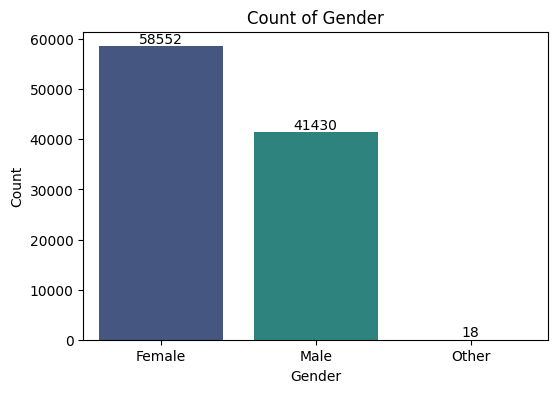

In [99]:
# Bar Chart for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

male_counts = df['gender'].value_counts()

for i, count in enumerate(male_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

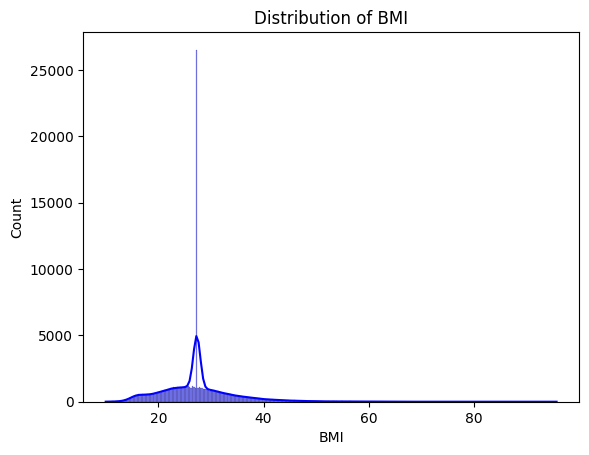

In [100]:
# Histograms and Density Plots for BMI
# plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, color='blue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.show()

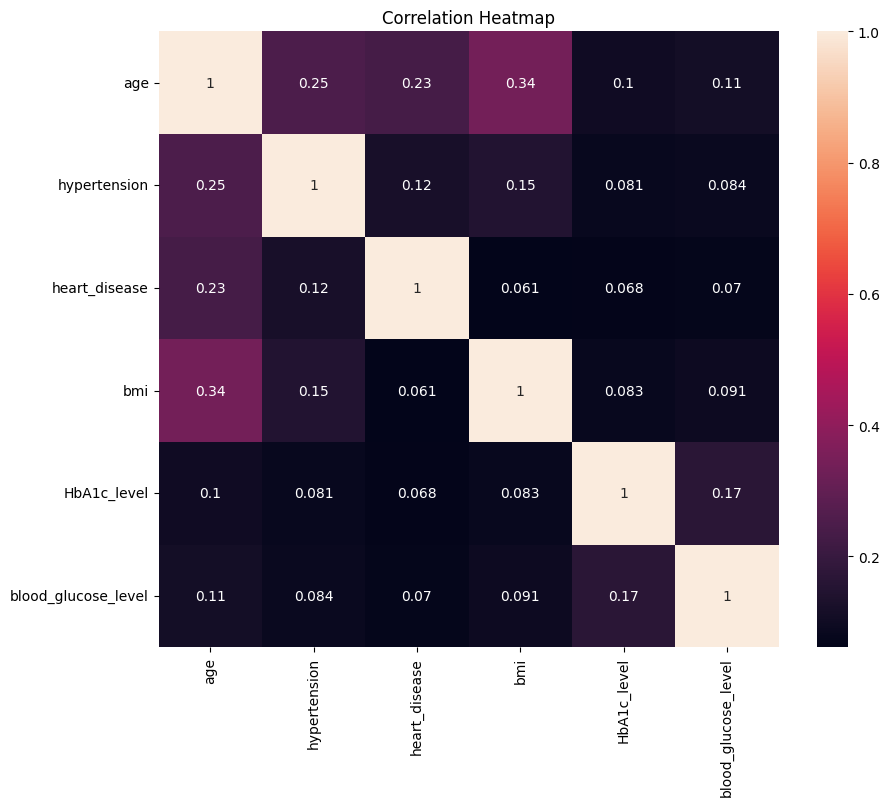

In [101]:
import seaborn as sns

data = df.drop(['gender','smoking_history','diabetes'], axis=1)
# y = df['diabetes']
y1 = df['diabetes']
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [102]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [129]:
corr_features = correlation(data, 0.5)
len(set(corr_features))
# there are no highly correlated features with an absolute correlation coefficient greater than 0.7.

0

In [130]:
corr_features

set()

## Logistic Regression Model

In [105]:
x = df.drop(['gender','smoking_history','diabetes'], axis=1)
y = df['diabetes']
x.shape

(100000, 6)

In [106]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [107]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Convert train and test data to arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"{X_train.shape}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(70000, 6)
(30000, 6)
(70000,)
(30000,)


In [108]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [109]:
sigmoid(0)

0.5

In [110]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(x[i],w) + b
        f = sigmoid(z)
        cost += -y[i] * (np.log(f)) - ((1-y[i]) * np.log(1-f))

    total_cost = cost/m
    return total_cost

In [111]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        dj_db += err_i
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
    
    dj_dw /= m
    dj_db /= m
        
    return dj_db, dj_dw

In [112]:
import math

# Define the gradient_descent function
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)  
        
        # Check for NaN values in the cost before appending and printing
        if not np.isnan(cost):
            J_history.append(cost)

        # if i < 100000:  
        #     J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.2f}")
        
    return w, b, J_history

In [113]:
w_init = np.zeros_like(X_train[0])
b_init = 0.
alpha = 0.00001
iters = 150

# Call the gradient_descent function
w_out, b_out, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, iters) 

print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")



Iteration    0: Cost 0.66
Iteration   15: Cost 0.46
Iteration   30: Cost 0.41
Iteration   45: Cost 0.39
Iteration   60: Cost 0.38
Iteration   75: Cost 0.38
Iteration   90: Cost 0.38
Iteration  105: Cost 0.38
Iteration  120: Cost 0.38
Iteration  135: Cost 0.38

Updated parameters: w:[-3.82652093e-03  1.17515431e-05  9.12674927e-06 -3.72374493e-03
 -6.96272595e-04 -1.20071969e-02], b:-0.0001608655447294253


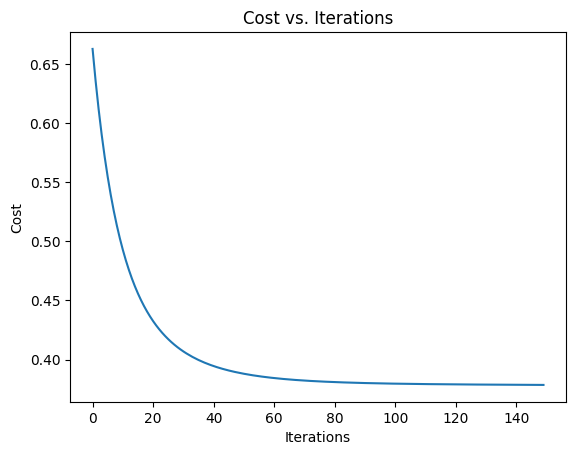

In [114]:
# J_hist contains the cost for each iteration, and iters is the number of iterations
# Plot the cost vs. iterations

plt.plot(range(iters), J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()


In [115]:
def predict(x):
    z = np.dot(x, w_out) + b_out
    probabilities = sigmoid(z)
    predictions = (probabilities >= 0.5).astype(int)
    return predictions


## Model Evaluation

In [116]:
def accuracy(predictions, actual):
    correct = np.sum(predictions == actual)
    actual = len(predictions)
    accuracy = correct /actual
    return accuracy 


accuracy(predict(X_train), y_train)
print(f"Training accuracy of model: {accuracy(predict(X_train), y_train)}")
print(f"Testing accuracy of model: {accuracy(predict(X_test), y_test)}")

Training accuracy of model: 0.9149571428571428
Testing accuracy of model: 0.9151


## Using Sklearn library

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x,y)


from sklearn.metrics import accuracy_score

pred = model.predict(x)
accuracy = accuracy_score(pred, y)

# Print the accuracy
print(f"Accuracy of train dataset: {accuracy:.2f}")

Accuracy of train dataset: 0.96


c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Principal Component Analysis

In [118]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [120]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [121]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [122]:
# Create a DataFrame for visualization
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df['target'] = y

In [123]:
# components
pca.components_


array([[ 0.56626425,  0.42136996,  0.35229713,  0.45655025,  0.28434924,
         0.29729827],
       [-0.26546785, -0.17589464, -0.1433495 , -0.21823352,  0.65605292,
         0.63246147]])

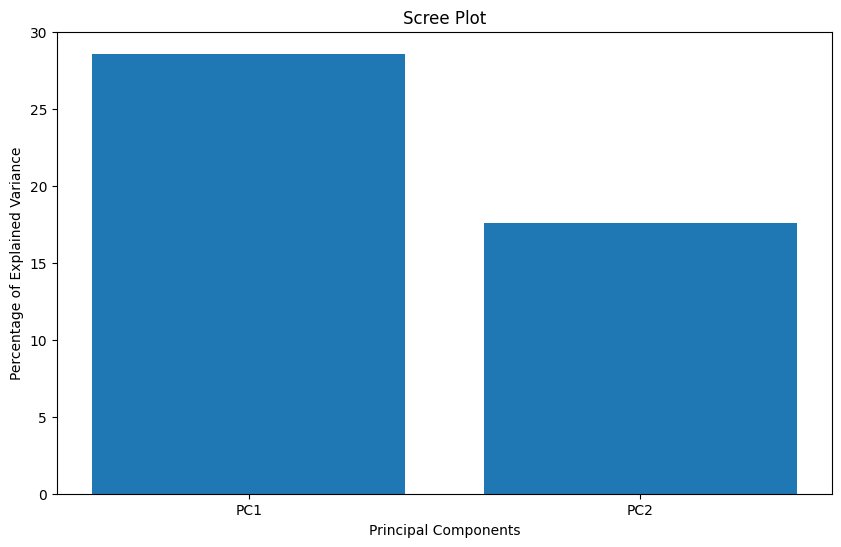

In [124]:

# Scree Plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')

plt.show()

In [126]:
df

,PC1,PC2,target
0,2.730174,-0.349546,0
1,-0.025796,-0.308578,0
2,-0.349033,0.658332,0
3,-0.621883,0.215733,0
4,3.514944,-1.674656,0
...,...,...,...
99995,0.594867,-0.704848,0
99996,-1.898491,0.881130,0
99997,0.619787,0.146940,0
99998,-0.767493,-1.503656,0


## Web based Interface using Gradio

In [125]:
import gradio as gr

def predict(age,bmi,heomoglobin, blood_glucose_level):
    result = model.predict([[age, bmi, heomoglobin, blood_glucose_level ]])
    return 'Person is Diabetes POSITIVE' if result == 1 else 'Person is Diabetes NEGATIVE'

interface = gr.Interface(fn=predict, inputs=['number','number','number','number'], outputs='text')

# Launch the Gradio interface
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
